Found 2054 files belonging to 4 classes.
Using 410 files for validation.
Class names: ['Apple', 'Banana', 'Carrot', 'Coconut']
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9805 - loss: 0.1158
Validation accuracy: 98.05%

Prediction for validation/apple1.jpg:
Predicted class: Apple
Confidence: 71.02%

All probabilities:
Apple: 71.02%
Banana: 0.01%
Carrot: 28.98%
Coconut: 0.00%


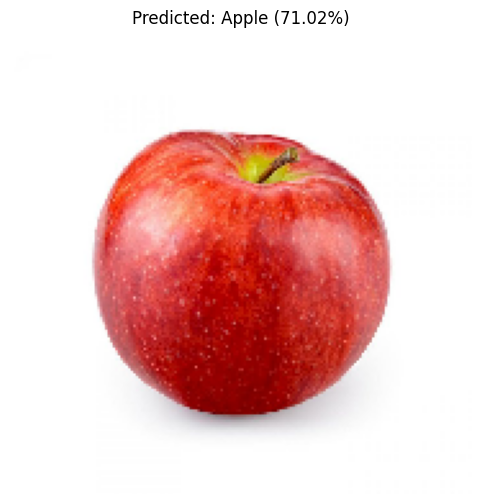

--------------------------------------------------

Prediction for validation/banana1.jpg:
Predicted class: Banana
Confidence: 66.74%

All probabilities:
Apple: 4.81%
Banana: 66.74%
Carrot: 7.89%
Coconut: 20.55%


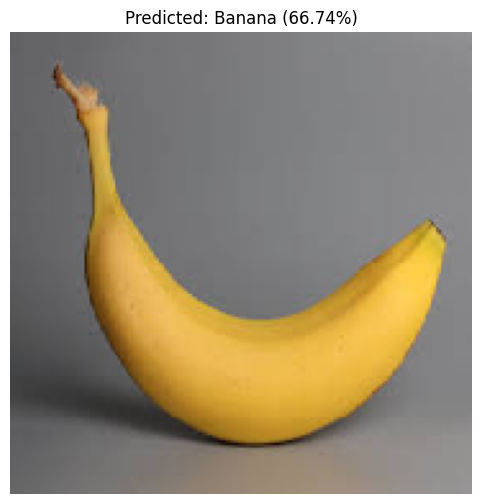

--------------------------------------------------

Prediction for validation/coconut2.jpg:
Predicted class: Coconut
Confidence: 99.23%

All probabilities:
Apple: 0.37%
Banana: 0.00%
Carrot: 0.40%
Coconut: 99.23%


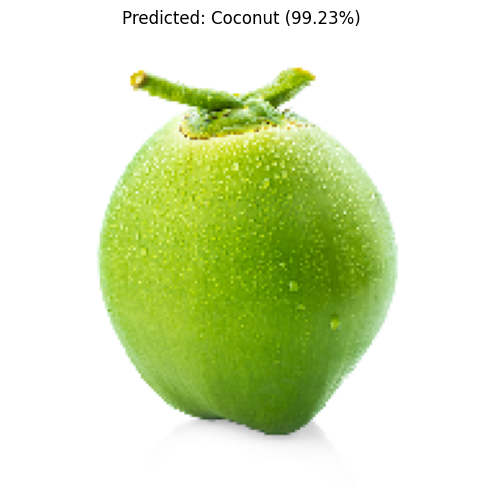

--------------------------------------------------

Prediction for validation/carot1.jpg:
Predicted class: Carrot
Confidence: 83.08%

All probabilities:
Apple: 14.13%
Banana: 1.45%
Carrot: 83.08%
Coconut: 1.34%


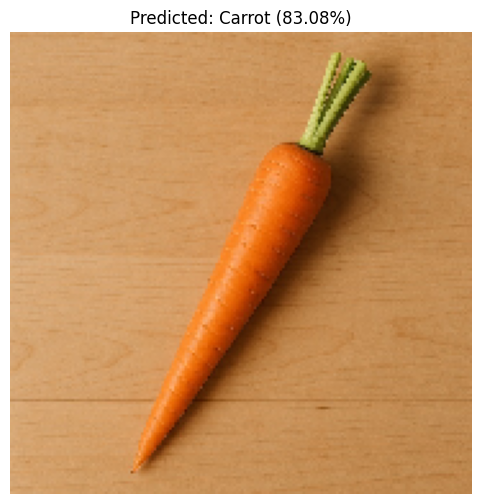

--------------------------------------------------

Prediction for validation/coconut1.jpg:
Predicted class: Coconut
Confidence: 94.14%

All probabilities:
Apple: 3.87%
Banana: 0.05%
Carrot: 1.94%
Coconut: 94.14%


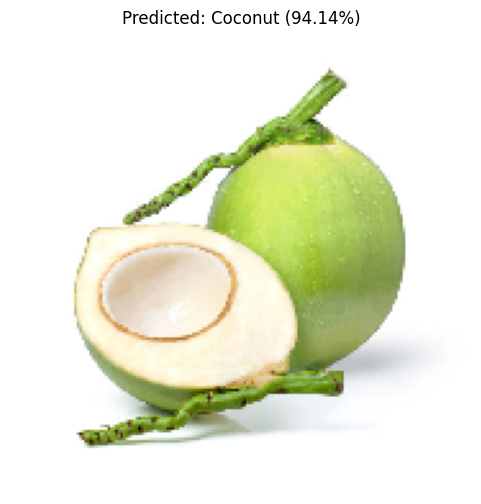

--------------------------------------------------

DEBUGGING: Testing on some training images
✓ dataset\Apple\Apple1.jpg: Apple (83.1%)
✓ dataset\Apple\Apple10.jpg: Apple (99.4%)
✓ dataset\Banana\Banana1.jpg: Banana (96.0%)
✓ dataset\Banana\Banana10.jpg: Banana (97.9%)
✓ dataset\Carrot\Carrot1.jpg: Carrot (99.9%)
✓ dataset\Carrot\Carrot10.jpg: Carrot (98.4%)


In [7]:
# Cell 1
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model("model1.keras")

# Same parameters as training
img_height = 180
img_width = 180
batch_size = 32

# Cell 2
# Load validation dataset with SAME parameters as training
val_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset",
    validation_split=0.2,  # Same split as training
    subset="validation",
    seed=42,  # Same seed as training
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

# Apply SAME preprocessing as training (without augmentation)
def preprocess_val(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Save the original dataset to get class_names before mapping
raw_val_ds = val_ds

val_ds = val_ds.map(preprocess_val, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

class_names = raw_val_ds.class_names
print("Class names:", class_names)

# Cell 3
# Evaluate model properly
loss, acc = model.evaluate(val_ds, verbose=1)
print(f"Validation accuracy: {acc*100:.2f}%")

# Cell 4
# Improved prediction function
def predict_image(img_path, show_details=True):
    """
    Predict image class with proper preprocessing
    """
    # Load and preprocess image EXACTLY like training
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = tf.cast(img_array, tf.float32) / 255.0  # Same normalization
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make prediction
    predictions = model.predict(img_array, verbose=0)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class] * 100
    
    if show_details:
        print(f"\nPrediction for {img_path}:")
        print(f"Predicted class: {class_names[predicted_class]}")
        print(f"Confidence: {confidence:.2f}%")
        
        print("\nAll probabilities:")
        for i, class_name in enumerate(class_names):
            prob = predictions[0][i] * 100
            print(f"{class_name}: {prob:.2f}%")
            
        # Display image
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.title(f"Predicted: {class_names[predicted_class]} ({confidence:.2f}%)")
        plt.axis('off')
        plt.show()
    
    return class_names[predicted_class], confidence

# Cell 5
# Test predictions on validation images
test_images = [
    "validation/apple1.jpg",
    "validation/banana1.jpg",
    "validation/coconut2.jpg",
    "validation/carot1.jpg",
    "validation/coconut1.jpg"
]

for img_path in test_images:
    try:
        predicted_class, confidence = predict_image(img_path)
        print("-" * 50)
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# Cell 6 
# Debug: Check a few training images to see if model works on them
print("\n" + "="*50)
print("DEBUGGING: Testing on some training images")
print("="*50)

# Test on actual training data to see if model learned anything
import os
for class_name in class_names[:3]:  # Test first 3 classes
    class_dir = os.path.join("dataset", class_name)
    if os.path.exists(class_dir):
        images = os.listdir(class_dir)[:2]  # Test 2 images per class
        for img_name in images:
            img_path = os.path.join(class_dir, img_name)
            try:
                predicted_class, confidence = predict_image(img_path, show_details=False)
                correct = "✓" if predicted_class.lower() == class_name.lower() else "✗"
                print(f"{correct} {img_path}: {predicted_class} ({confidence:.1f}%)")
            except Exception as e:
                print(f"Error with {img_path}: {e}")